In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
column_names = ["Sex", "Length", "Diameter", "Height", "Whole Weight", 
                "Shucked Weight", "Viscera Weight", "Shell Weight", "Rings"]
data =pd.read_csv('Desktop/Data/abalone.csv',names=column_names)

In [3]:
data.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole Weight      4177 non-null float64
Shucked Weight    4177 non-null float64
Viscera Weight    4177 non-null float64
Shell Weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Rings             0
dtype: int64

In [6]:
data.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
sex_d = {'M': 1, 'F' : 2,'I':3}
data['Sex'] = data['Sex'].apply(lambda x: sex_d[x])

In [8]:
data.Sex = data.Sex.astype(float)

#Adding age column in the dataframe for classification. Age is classified based on the number of rings.
Rings 1-8 -->Age 1, denoting young
Rings 9-10 -->Age 2, denoting middle
Rings 11-29 -->Age 3, denoting ol

In [9]:
def label_r (row):
    if row['Rings']>=1 and row['Rings']<=8:
        return 1
    elif row['Rings'] >=9 and row['Rings']<=10:
        return 2
    elif row['Rings']>=11 and row['Rings']<=29:
        return 3
    return 0

In [10]:
data['Age']=data.apply (lambda row: label_r (row),axis=1)

In [11]:
data

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,Age
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,3
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,3.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
5,3.0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8,1
6,2.0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20,3
7,2.0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16,3
8,1.0,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9,2
9,2.0,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19,3


In [12]:
data[data['Height']==0]

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,Age
1257,3.0,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8,1
3996,3.0,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6,1


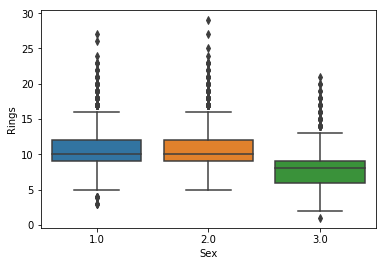

In [13]:
ax = sns.boxplot(x="Sex", y="Rings", data=data)

#Infants have lower number of rings as compared to males and female

In [14]:
y=data['Age']

#Predictor variables obtained by dropping rings and age from the dataframe

In [15]:
X=data.drop(['Age','Rings'], axis=1)

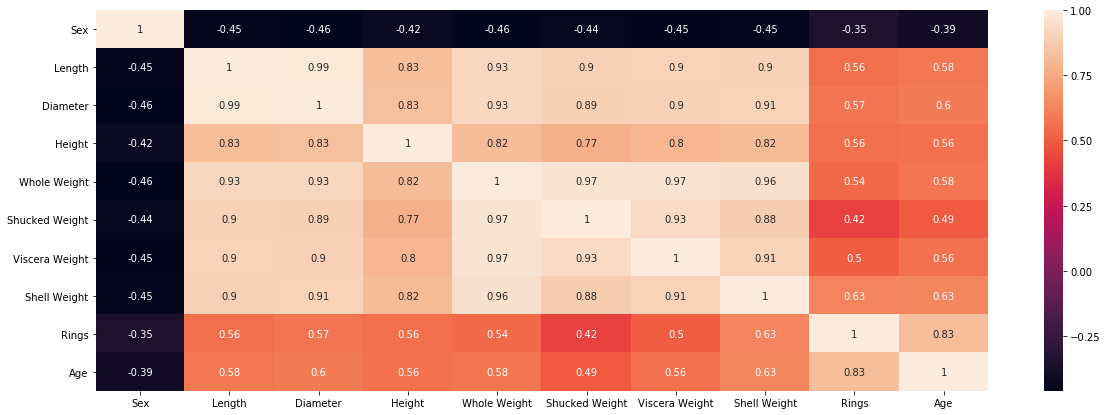

In [16]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True)

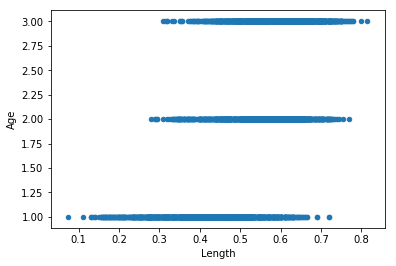

In [17]:
data.plot.scatter('Length','Age')

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
pred = lr.predict(X_test)
lr.score(X_test, y_test)

0.4223207065416265

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE', mean_absolute_error(y_test,pred))
print('MSE', mean_squared_error(y_test,pred))
print('RMSE', np.sqrt(mean_squared_error(y_test,pred)))

MAE 0.5098793788008732
MSE 0.3859427824695999
RMSE 0.6212429335369537


In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(X_train, y_train)

C:\Users\Monika\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
pred = rfc.predict(X_test)
rfc.score(X_test, y_test)

0.6180223285486444

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE', mean_absolute_error(y_test,pred))
print('MSE', mean_squared_error(y_test,pred))
print('RMSE', np.sqrt(mean_squared_error(y_test,pred)))

MAE 0.43221690590111644
MSE 0.532695374800638
RMSE 0.7298598322970227


In [25]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr.fit(X_test, y_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [26]:
pred = gbr.predict(X_train)
y_pred = gbr.predict(X_test)

In [27]:
gbr.score(X_test, y_test)

0.6730440671199946